In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

C:\Users\skhim\AppData\Local\Temp\ipykernel_19328\3369516201.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('keystrokes_unlabelled.csv')

In [4]:
data = df.values[:, :]
data

array([[0.06389213, 0.06548691, 0.27017784, ..., 0.19145274, 0.        ,
        0.        ],
       [0.04494572, 0.12423682, 1.08353782, ..., 0.18031001, 0.        ,
        0.        ],
       [0.05611873, 0.09387302, 0.46452189, ..., 0.18774247, 2.        ,
        0.        ],
       ...,
       [0.08184624, 0.09534287, 0.1978662 , ..., 0.21710086, 0.        ,
        0.        ],
       [0.08114052, 0.10931969, 0.33868432, ..., 0.23655939, 1.        ,
        2.        ],
       [0.06738091, 0.11844945, 0.25466657, ..., 0.25571656, 0.        ,
        2.        ]])

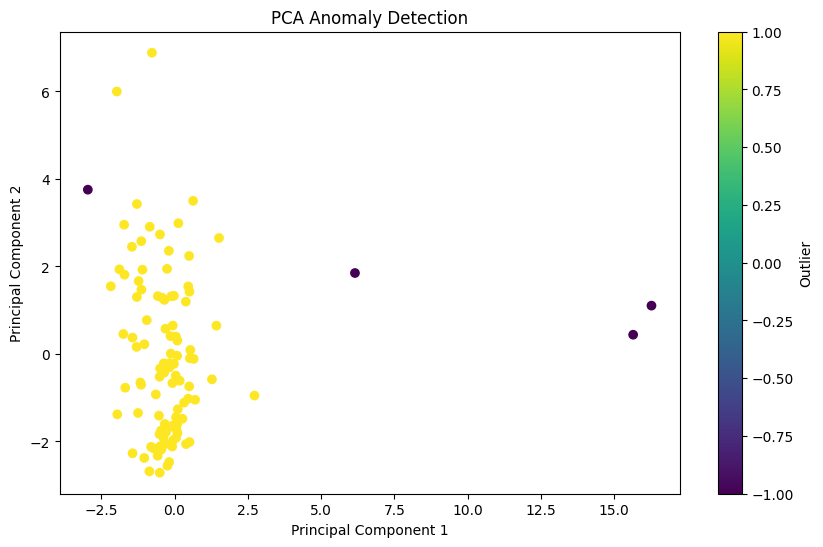

In [8]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca.fit(scaled_data)
reduced_data = pca.transform(scaled_data)

# Fit Elliptic Envelope to the reduced data
envelope = EllipticEnvelope(contamination=0.038)
envelope.fit(reduced_data)

# Predict outliers
outliers = envelope.predict(reduced_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=outliers, cmap='viridis')
plt.colorbar(label='Outlier')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Anomaly Detection')
plt.show()


In [9]:
print(outliers)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1 -1 -1]


In [10]:
correct = [1] * 100+ [-1]* 4
predicted = list(outliers)
accuracy = 0
total = 0
for c, p in zip(correct, predicted):
    if c == p:
        accuracy += 1
    total += 1
print(accuracy/total)

0.9807692307692307


In [7]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=1)
pca.fit(scaled_data)
reduced_data = pca.transform(scaled_data)

# Fit Elliptic Envelope to the reduced data
envelope = EllipticEnvelope(contamination=0.038)
envelope.fit(reduced_data)

# Predict outliers
outliers = envelope.predict(reduced_data)

print(outliers)
# Plotting
# plt.figure(figsize=(10, 6))
# plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=outliers, cmap='viridis')
# plt.colorbar(label='Outlier')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Anomaly Detection')
# plt.show()

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1]
